# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) DSI-5 Capstone Project: Video Games Sales Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np

## 1. Reading the data

In [2]:
data = pd.read_csv('./data/gfinal.csv')

In [3]:
data

,Name_Console,Name,Platform,Publisher,Genre,Release_Year,Release_Month,First_Week,Total_Sales,Critic_Score,User_Score
0,.hack//G.U. Last Recode (PS4),.hack//G.U. Last Recode,PS4,Namco Bandai Games,Role-Playing,2017,11,86008.0,86008.0,NaN,NaN
1,.hack//Link (PSP),.hack//Link,PSP,Namco Bandai Games,Role-Playing,2010,3,63258.0,63258.0,NaN,NaN
2,1-2-Switch (NS),1-2-Switch,NS,Nintendo,Party,2017,3,195332.0,413302.0,4.9,NaN
3,2010 FIFA World Cup South Africa (PS3),2010 FIFA World Cup South Africa,PS3,Electronic Arts,Sports,2010,5,159986.0,481629.0,8.2,NaN
4,2010 FIFA World Cup South Africa (X360),2010 FIFA World Cup South Africa,X360,Electronic Arts,Sports,2010,5,106021.0,288574.0,8.4,NaN
5,2014 FIFA World Cup Brazil (PS3),2014 FIFA World Cup Brazil,PS3,Electronic Arts,Sports,2014,4,71704.0,229829.0,7.9,NaN
6,2014 FIFA World Cup Brazil (X360),2014 FIFA World Cup Brazil,X360,Electronic Arts,Sports,2014,4,58285.0,84430.0,7.3,NaN
7,3D Dot Game Heroes (PS3),3D Dot Game Heroes,PS3,Atlus,Role-Playing,2010,5,73619.0,172218.0,7.5,NaN
8,3rd Super Robot Wars Z Jigoku Hen (PS3),3rd Super Robot Wars Z Jigoku Hen,PS3,Namco Bandai Games,Role-Playing,2014,4,148008.0,179693.0,NaN,NaN
9,3rd Super Robot Wars Z Jigoku Hen (PSV),3rd Super Robot Wars Z Jigoku Hen,PSV,Namco Bandai Games,Role-Playing,2014,4,126941.0,126941.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 11 columns):
Name_Console     2968 non-null object
Name             2968 non-null object
Platform         2968 non-null object
Publisher        2968 non-null object
Genre            2968 non-null object
Release_Year     2968 non-null int64
Release_Month    2968 non-null int64
First_Week       2968 non-null float64
Total_Sales      2968 non-null float64
Critic_Score     1285 non-null float64
User_Score       109 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 255.1+ KB


In [5]:
data.describe()

,Release_Year,Release_Month,First_Week,Total_Sales,Critic_Score,User_Score
count,2968.000000,2968.000000,2.968000e+03,2.968000e+03,1285.000000,109.000000
mean,2011.719677,6.778639,2.231961e+05,4.258220e+05,7.757977,8.728440
std,3.684232,3.237564,5.223938e+05,9.671253e+05,1.094610,1.041197
min,2004.000000,1.000000,4.254000e+03,5.616000e+03,2.800000,3.800000
25%,2009.000000,4.000000,4.141650e+04,5.187275e+04,7.100000,8.300000
50%,2012.000000,7.000000,8.015750e+04,1.208985e+05,8.000000,9.000000
75%,2015.000000,10.000000,1.880785e+05,3.629495e+05,8.500000,9.500000
max,2018.000000,12.000000,9.705853e+06,1.436414e+07,10.000000,10.000000


In [6]:
data['Critic_Score'].unique()
#data is full of missing values. Data may be dropped depending on the model applied.

array([ nan,  4.9,  8.2,  8.4,  7.9,  7.3,  7.5,  8.1,  5.9,  7.7,  7.6,
        7. ,  9. ,  6.4,  8.3,  6.7,  6.9,  6.2,  6.1,  6. ,  6.3,  4.8,
        7.1,  8.5,  8.7,  6.6,  8. ,  6.5,  7.4,  6.8,  5. ,  8.8,  8.6,
        9.1,  7.8,  9.6,  9.5,  8.9,  9.3,  7.2,  5.4,  5.2,  9.2,  5.8,
        5.6,  5.3,  4.5,  4. , 10. ,  4.6,  4.4,  4.3,  9.4,  9.7,  5.1,
        5.5,  4.7,  2.8,  3.3])

In [7]:
data = data.set_index('Name_Console')

In [8]:
data

,Name,Platform,Publisher,Genre,Release_Year,Release_Month,First_Week,Total_Sales,Critic_Score,User_Score
Name_Console,,,,,,,,,,
.hack//G.U. Last Recode (PS4),.hack//G.U. Last Recode,PS4,Namco Bandai Games,Role-Playing,2017,11,86008.0,86008.0,NaN,NaN
.hack//Link (PSP),.hack//Link,PSP,Namco Bandai Games,Role-Playing,2010,3,63258.0,63258.0,NaN,NaN
1-2-Switch (NS),1-2-Switch,NS,Nintendo,Party,2017,3,195332.0,413302.0,4.9,NaN
2010 FIFA World Cup South Africa (PS3),2010 FIFA World Cup South Africa,PS3,Electronic Arts,Sports,2010,5,159986.0,481629.0,8.2,NaN
2010 FIFA World Cup South Africa (X360),2010 FIFA World Cup South Africa,X360,Electronic Arts,Sports,2010,5,106021.0,288574.0,8.4,NaN
2014 FIFA World Cup Brazil (PS3),2014 FIFA World Cup Brazil,PS3,Electronic Arts,Sports,2014,4,71704.0,229829.0,7.9,NaN
2014 FIFA World Cup Brazil (X360),2014 FIFA World Cup Brazil,X360,Electronic Arts,Sports,2014,4,58285.0,84430.0,7.3,NaN
3D Dot Game Heroes (PS3),3D Dot Game Heroes,PS3,Atlus,Role-Playing,2010,5,73619.0,172218.0,7.5,NaN
3rd Super Robot Wars Z Jigoku Hen (PS3),3rd Super Robot Wars Z Jigoku Hen,PS3,Namco Bandai Games,Role-Playing,2014,4,148008.0,179693.0,NaN,NaN


#### Remaining Features:  
Index: Name_Console - Combination of the game title and game platform. Same game on different platforms will be treated as different games for this analysis.
1. Name - Game title. This feature is preserved for joining purposes but will not be used in the analysis.  
2. Platform - Game platform the game is released on.  
3. Publisher - Company that published the game.  
4. Genre - Genre.  
5. Release_Year. This feature is preserved for train-test split later but will not be used in the analysis as it makes no sense to analyse year of release to predict future sales.  
6. Release_Month - Month of game release date.  
7. First_Week - Unit sales at the end of first week after release.  
8. Total_Sales - Total unit sales after 6 weeks.  
9. Critic_Score - Averaged rating scores given by game critics. This feature is 57% missing values.  
10. User_Score - Scores given by vgchartz.com users. This feature is 96% missing values, will be dropped.

#### Pre-processing data for modelling

In [9]:
#I want to preserve the 'data' DataFrame in case I want to process it differently later.
df = data.copy()

In [10]:
#Labels will be applied, '1' for Total_Sales over 1,000,000 unit sales and '0' for Total_Sales under 1,000,000 unit sales.
df['is_successful'] = df['Total_Sales'].apply(lambda x : 1 if x>1000000 else 0)

In [11]:
#'Release_Month' will be preserved as a feature, but treated as categorical values. 
df['Release_Month'] = df['Release_Month'].astype(str)

In [12]:
#Getting dummies for categorical data
df2 = pd.get_dummies(df[['Platform','Publisher','Genre','Release_Month']])

In [13]:
#Joining everything
df = pd.concat([df[['First_Week','Critic_Score','is_successful']], df2], axis=1)

In [14]:
#Standardising 'First_Week' as the values are extremely large compared to other data.
df['First_Week'] = df['First_Week'].map(lambda x : (x-df['First_Week'].mean()/df['First_Week'].std()))

In [15]:
df

,First_Week,Critic_Score,is_successful,Platform_3DS,Platform_DS,Platform_NS,Platform_PC,Platform_PS3,Platform_PS4,Platform_PSP,...,Release_Month_11,Release_Month_12,Release_Month_2,Release_Month_3,Release_Month_4,Release_Month_5,Release_Month_6,Release_Month_7,Release_Month_8,Release_Month_9
Name_Console,,,,,,,,,,,,,,,,,,,,,
.hack//G.U. Last Recode (PS4),8.600757e+04,NaN,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
.hack//Link (PSP),6.325757e+04,NaN,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1-2-Switch (NS),1.953316e+05,4.9,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2010 FIFA World Cup South Africa (PS3),1.599856e+05,8.2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2010 FIFA World Cup South Africa (X360),1.060206e+05,8.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2014 FIFA World Cup Brazil (PS3),7.170357e+04,7.9,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2014 FIFA World Cup Brazil (X360),5.828457e+04,7.3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3D Dot Game Heroes (PS3),7.361857e+04,7.5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3rd Super Robot Wars Z Jigoku Hen (PS3),1.480076e+05,NaN,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df['Year']=data['Release_Year']

#### Train-test split

In [17]:
#Train on games released earlier than 2017, test on 2017 releases, predict on 2018 releases
train = df.loc[df['Year']<2017]
test = df.loc[df['Year']==2017]
hold = df.loc[df['Year']>2017]

In [53]:
#Defining X and y
X_train, y_train = train.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), train['is_successful']
X_test, y_test = test.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), test['is_successful']
X_hold, y_hold = hold.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), hold['is_successful']

In [19]:
#Defining function for evaluating models
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print("Cross-validated scores for train set:", scores)
    print("Mean cross-validated score:", scores.mean())
    
    #Fitting the model
    model = model.fit(X_train, y_train)
    
    #Predictions/probabilities on the test dataset
    y_pred = pd.DataFrame(model.predict(X_test))  
    y_prob = pd.DataFrame(model.predict_proba(X_test))

    acc = accuracy_score(y_test, y_pred)  
    roc_auc = roc_auc_score(y_test, y_prob[1])
    print("Accuracy for test set:",acc)
    print("ROC AUC Score for test set:",roc_auc)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return model

In [20]:
#Defining function for getting important features
def impt_feat(coef, X_test):
    return pd.Series(coef, index=X_test.columns).sort_values(ascending=False)

#### Applying baseline

In [21]:
#Since the majority class is 0 (not successful), baseline model is all 0s.
y_base = pd.Series([0 for i in range(len(X_test))])
acc = accuracy_score(y_test, y_base)
print("Accuracy for test set:",acc)
print(confusion_matrix(y_test, y_base))
print(classification_report(y_test, y_base))

Accuracy for test set: 0.8591549295774648
[[183   0]
 [ 30   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       183
           1       0.00      0.00      0.00        30

   micro avg       0.86      0.86      0.86       213
   macro avg       0.43      0.50      0.46       213
weighted avg       0.74      0.86      0.79       213



C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Trying Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

lrmodel = evaluate_model(lr, X_train, y_train, X_test, y_test)

Cross-validated scores for train set: [0.89163498 0.89333333 0.87022901 0.88358779 0.89503817]
Mean cross-validated score: 0.8867646552307974
Accuracy for test set: 0.8544600938967136
ROC AUC Score for test set: 0.7741347905282332
[[179   4]
 [ 27   3]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       183
           1       0.43      0.10      0.16        30

   micro avg       0.85      0.85      0.85       213
   macro avg       0.65      0.54      0.54       213
weighted avg       0.81      0.85      0.81       213



C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [24]:
impt_feat(lr.coef_[0],X_test)

Publisher_Nintendo                                  1.981339
Publisher_Microsoft Game Studios                    1.364251
Release_Month_11                                    1.317665
Platform_PS4                                        1.113087
Publisher_Ubisoft                                   1.084785
Publisher_Capcom                                    0.986169
Release_Month_12                                    0.985800
Publisher_Level 5                                   0.954050
Publisher_Electronic Arts                           0.944748
Publisher_NCSoft                                    0.906336
Publisher_Activision                                0.880980
Publisher_Hello Games                               0.858154
Publisher_Sony Computer Entertainment               0.827927
Publisher_GungHo                                    0.818373
Publisher_Sony Computer Entertainment America       0.765162
Genre_Role-Playing                                  0.528220
Publisher_Bethesda Softw

#### Trying Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

In [54]:
rfc = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=28, scoring='recall', n_jobs = -1)

In [55]:
#Finding best parameters from randomized search CV.
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [56]:
#Evaluating model with best parameters
rfc = RandomForestClassifier(n_estimators = 1600, max_depth = 110, bootstrap = False, random_state = 28)
rfmodel = evaluate_model(rfc, X_train, y_train, X_test, y_test)

Cross-validated scores for train set: [0.90874525 0.88952381 0.82061069 0.8759542  0.89312977]
Mean cross-validated score: 0.8775927426321296
Accuracy for test set: 0.8685446009389671
ROC AUC Score for test set: 0.7348816029143898
[[174   9]
 [ 19  11]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       183
           1       0.55      0.37      0.44        30

   micro avg       0.87      0.87      0.87       213
   macro avg       0.73      0.66      0.68       213
weighted avg       0.85      0.87      0.86       213



In [35]:
#Original blank rfc model
rfc = RandomForestClassifier(random_state = 28)
rfmodel = evaluate_model(rfc, X_train, y_train, X_test, y_test)

C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest

Cross-validated scores for train set: [0.90684411 0.88761905 0.8110687  0.88358779 0.89312977]
Mean cross-validated score: 0.876449882724982
Accuracy for test set: 0.8779342723004695
ROC AUC Score for test set: 0.6920765027322404
[[175   8]
 [ 18  12]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       183
           1       0.60      0.40      0.48        30

   micro avg       0.88      0.88      0.88       213
   macro avg       0.75      0.68      0.71       213
weighted avg       0.86      0.88      0.87       213



In [40]:
pd.DataFrame(impt_feat(rfmodel.feature_importances_, X_test)).reset_index()

,index,0
0,Release_Month_11,1.351034e-01
1,Genre_Shooter,5.136777e-02
2,Publisher_Nintendo,3.869233e-02
3,Platform_PS4,3.739327e-02
4,Publisher_Activision,3.584476e-02
5,Publisher_Ubisoft,3.358623e-02
6,Platform_PC,3.244152e-02
7,Publisher_Microsoft Game Studios,2.667303e-02
8,Genre_Action,2.490155e-02
9,Publisher_Electronic Arts,2.452372e-02


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(y = 'index', x = 0, data = pd.DataFrame(impt_feat(rfmodel.feature_importances_, X_test)).reset_index().head(20), palette='Blues_d')
plt.xticks(fontsize = 12)
plt.xlabel('Feature Importance', fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Features',fontsize=12)
plt.show()

<Figure size 1500x700 with 1 Axes>

#### Trying XGBoost

In [61]:
#'''
#redefining X and y. Because XGBoost and Random Forest can handle missing values?
X_train, y_train = train.drop(['is_successful','First_Week','Year'],axis=1), train['is_successful']
X_test, y_test = test.drop(['is_successful','First_Week','Year'],axis=1), test['is_successful']
X_hold, y_hold = hold.drop(['is_successful','First_Week','Year'],axis=1), hold['is_successful']
#'''

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [48]:
# Setting parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 28)

xgb_random = RandomizedSearchCV(xgb, param_distributions=params, n_iter=100, scoring='recall', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [49]:
#Finding best parameters from randomized search CV.
xgb_random.fit(X_train, y_train)
xgb_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   25.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  5.0min finished


{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

In [50]:
#XGBoost with randomized search params
xgb = XGBClassifier(max_depth = 5, learning_rate=0.02, n_estimators=600, subsample=0.8, colsample_bytree=0.6, gamma=0.5,
                    silent=True, nthread=1, random_state=28)  

xgbmodel = evaluate_model(xgb, X_train, y_train, X_test, y_test)

Cross-validated scores for train set: [0.91444867 0.90857143 0.88549618 0.89885496 0.91030534]
Mean cross-validated score: 0.9035353172645136
Accuracy for test set: 0.9014084507042254
ROC AUC Score for test set: 0.8755009107468124
[[179   4]
 [ 17  13]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       183
           1       0.76      0.43      0.55        30

   micro avg       0.90      0.90      0.90       213
   macro avg       0.84      0.71      0.75       213
weighted avg       0.89      0.90      0.89       213



In [31]:
#Original parameters
xgb = XGBClassifier(max_depth = 6, n_estimators = 500,random_state=28)  

xgbmodel = evaluate_model(xgb, X_train, y_train, X_test, y_test)

Cross-validated scores for train set: [0.8973384  0.89333333 0.86068702 0.88931298 0.89122137]
Mean cross-validated score: 0.886378622084192
Accuracy for test set: 0.8967136150234741
ROC AUC Score for test set: 0.8614754098360656
[[178   5]
 [ 17  13]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       183
           1       0.72      0.43      0.54        30

   micro avg       0.90      0.90      0.90       213
   macro avg       0.82      0.70      0.74       213
weighted avg       0.89      0.90      0.89       213



In [62]:
impt_feat(xgbmodel.feature_importances_, X_test)

Critic_Score                            0.207029
Genre_Role-Playing                      0.042544
Release_Month_11                        0.040979
Genre_Shooter                           0.039841
Platform_PS4                            0.039414
Publisher_Nintendo                      0.034576
Genre_Action                            0.028600
Publisher_Ubisoft                       0.027177
Platform_PC                             0.026039
Publisher_Electronic Arts               0.023620
Platform_PS3                            0.023478
Platform_PSP                            0.023335
Release_Month_12                        0.020774
Release_Month_10                        0.019636
Genre_Sports                            0.019636
Platform_DS                             0.018782
Publisher_Activision                    0.018213
Genre_Misc                              0.018213
Publisher_Microsoft Game Studios        0.018071
Publisher_Capcom                        0.017217
Release_Month_3     

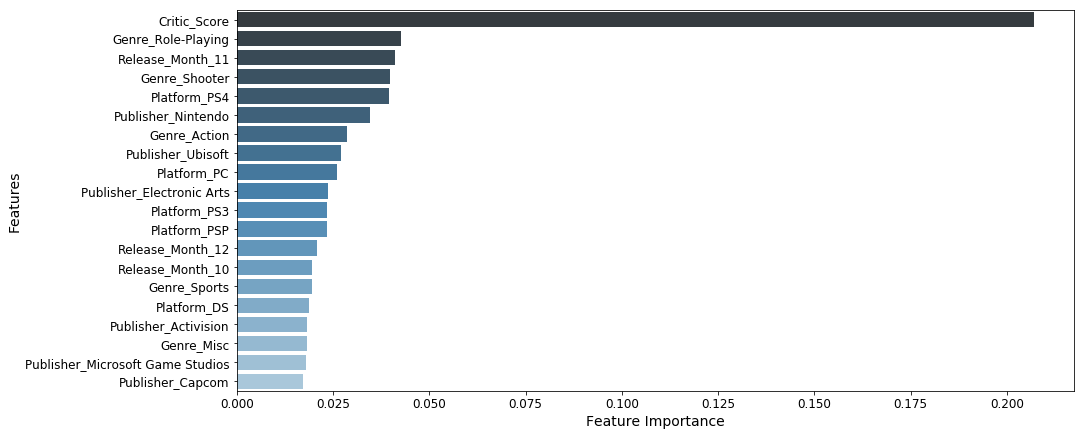

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(y = 'index', x = 0, data = pd.DataFrame(impt_feat(xgbmodel.feature_importances_, X_test)).reset_index().head(20), palette='Blues_d')
plt.xticks(fontsize = 12)
plt.xlabel('Feature Importance', fontsize=14)
plt.yticks(fontsize = 12)
plt.ylabel('Features',fontsize=14)
plt.show()

In [60]:
#import seaborn as sns
corrlist = []
for variable in X_test.columns:
    corrlist.append((variable,(np.corrcoef(X_test[variable], y_test))[0][1]))
pd.DataFrame(corrlist,columns=['Variable','Correlation']).sort_values('Correlation', ascending = False).head(20)

C:\Users\yitaris\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yitaris\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,Variable,Correlation
15,Publisher_Activision,0.274945
157,Genre_Shooter,0.239868
44,Publisher_Electronic Arts,0.147282
163,Release_Month_11,0.137730
137,Publisher_Ubisoft,0.122284
97,Publisher_Nintendo,0.119597
170,Release_Month_7,0.110461
86,Publisher_Microsoft Studios,0.100519
113,Publisher_Sony Computer Entertainment,0.100519
116,Publisher_Sony Interactive Entertainment,0.076769


In [64]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X_test, y_test):
    
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

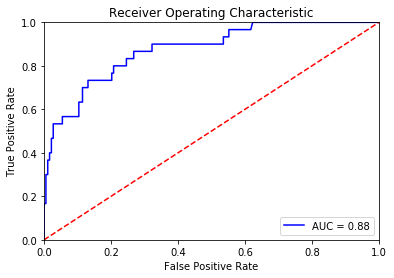

In [65]:
plot_roc_curve(xgbmodel, X_test, y_test)

#### Applying XGBoost on hold set

In [37]:
pd.Series(xgbmodel.predict(X_hold)).value_counts()
#We expect the model to predict all 0s for the hold set. Hmm...

0    127
1      5
dtype: int64

In [38]:
y_hold.value_counts()

0    127
1      5
Name: is_successful, dtype: int64

#### Applying XGBoost on subset of hold set  
Here we apply predictions for games released in August 2018. As of the time of this presentation the results should only be just updated, and we can compare the values.

In [66]:
finalhold = hold.loc[(hold['Release_Month_8']==1)]

In [67]:
X_fhold, y_fhold = finalhold.drop(['is_successful','Year','First_Week'],axis=1), finalhold['is_successful']

In [68]:
#Predictions/probabilities on the test dataset
fy_pred = pd.DataFrame(xgbmodel.predict(X_fhold))  
fy_prob = pd.DataFrame(xgbmodel.predict_proba(X_fhold))

fxgb_acc = accuracy_score(y_fhold, fy_pred)  
#fxgb_roc_auc = roc_auc_score(y_fhold, fy_prob[1])
print("Accuracy for test set:",fxgb_acc)
#print("ROC AUC Score for test set:",fxgb_roc_auc)
print(confusion_matrix(y_fhold, fy_pred))
print(classification_report(y_fhold, fy_pred))

Accuracy for test set: 1.0
[[20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [69]:
#Setting up a DataFrame to compare predicted vs Actual results
conclusion = pd.DataFrame(y_fhold.reset_index(), columns=['Name_Console','Predicted']).head().fillna(0)

In [70]:
conclusion['Predicted']=conclusion['Predicted'].astype(int)
conclusion['Actual']=['47,922','N/A','282,353','76,546','48,754']
#Numbers taken from vgchartz.com

In [71]:
conclusion.set_index('Name_Console')

,Predicted,Actual
Name_Console,,
Dead Cells (NS),0,"47,922"
Etrian Odyssey X (3DS),0,N/A
F1 2018 (PS4),0,"282,353"
F1 2018 (XOne),0,"76,546"
Fire Pro Wrestling World (PS4),0,"48,754"


#### Dealing with inbalanced training set

In [72]:
#Redefining X and y because SMOTE doesn't work with Nan values
X_train, y_train = train.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), train['is_successful']
X_test, y_test = test.drop(['is_successful','Critic_Score','Year','First_Week'],axis=1), test['is_successful']

In [73]:
y_train.value_counts()

0    2351
1     272
Name: is_successful, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=28)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [75]:
sum(y_train_res==0)

2351

In [76]:
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)
X_train_res

,Platform_3DS,Platform_DS,Platform_NS,Platform_PC,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,...,Release_Month_11,Release_Month_12,Release_Month_2,Release_Month_3,Release_Month_4,Release_Month_5,Release_Month_6,Release_Month_7,Release_Month_8,Release_Month_9
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
xgb2 = XGBClassifier(max_depth = 5, learning_rate=0.02, n_estimators=600, subsample=0.8, colsample_bytree=0.6, gamma=0.5,
                    silent=True, nthread=1, random_state=28) 

xgbmodel2 = evaluate_model(xgb2, X_train_res, y_train_res, X_test, y_test)

Cross-validated scores for train set: [0.77282378 0.93191489 0.90212766 0.93191489 0.92765957]
Mean cross-validated score: 0.8932881600939604
Accuracy for test set: 0.8403755868544601
ROC AUC Score for test set: 0.7710382513661203
[[173  10]
 [ 24   6]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       183
           1       0.38      0.20      0.26        30

   micro avg       0.84      0.84      0.84       213
   macro avg       0.63      0.57      0.59       213
weighted avg       0.81      0.84      0.82       213



In [78]:
pd.DataFrame(impt_feat(xgbmodel2.feature_importances_, X_test)).reset_index()

,index,0
0,Release_Month_11,0.055228
1,Platform_PS4,0.045320
2,Publisher_Nintendo,0.038997
3,Release_Month_10,0.038575
4,Platform_X360,0.037099
5,Publisher_Electronic Arts,0.036889
6,Platform_PS3,0.036046
7,Genre_Shooter,0.034359
8,Genre_Role-Playing,0.033305
9,Genre_Action,0.033305


In [51]:
data['Release_Year'].value_counts()

2011    273
2013    257
2014    247
2012    246
2010    238
2009    233
2016    233
2015    224
2017    213
2007    202
2008    190
2006    159
2018    132
2005     96
2004     25
Name: Release_Year, dtype: int64